Create a set with non-linear data to work with.

In [1]:
#Create a set of non-linear data
import numpy as np
np.random.seed(42)
m = 1000
X = 5 * np.random.rand(m,1) - 2.5
y = np.sin(X)*100 + np.random.randn(m,1)

Visualize the data.

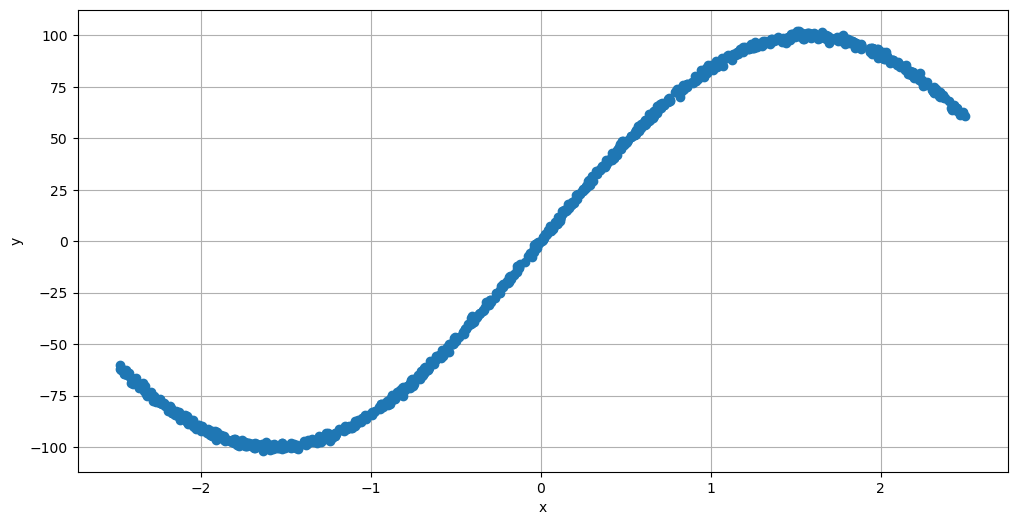

In [2]:
# Visualize the data
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,6))
plt.plot(X, y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Standardize the data and plot the learning curve.

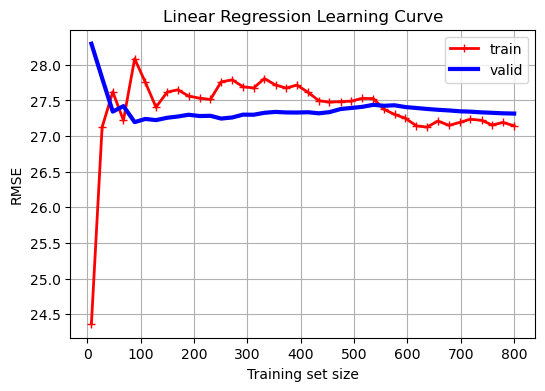

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Standardize the data
std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X)

#Plot the learning curve for Linear Regression
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_std_scaled, y, train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4)) 
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Linear Regression Learning Curve")
plt.grid()
plt.legend(loc="upper right")

plt.show()

Transform the data into a 50-degree polynomial and standardize the data. <br>
Plot the learning curve for Polynomial Regression.

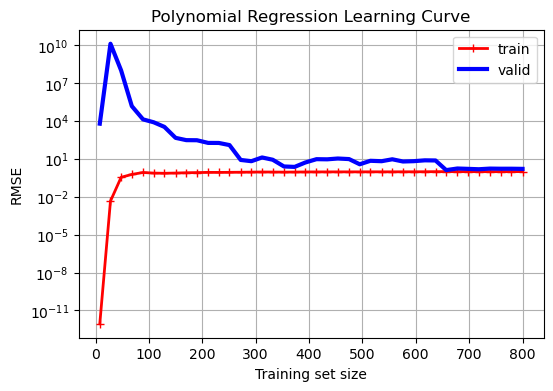

In [4]:
from sklearn.preprocessing import PolynomialFeatures

#Transform the data into a 50 degree polynomial and apply standardization
poly_features = PolynomialFeatures(degree=50, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly_scaled = std_scaler.fit_transform(X_poly)

#Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly_scaled, y, train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.yscale("log")
plt.grid()
plt.title("Polynomial Regression Learning Curve")

plt.show()

Repeat the process for a Regularized Linear Regression model using Ridge Regression with alpha=0.001.

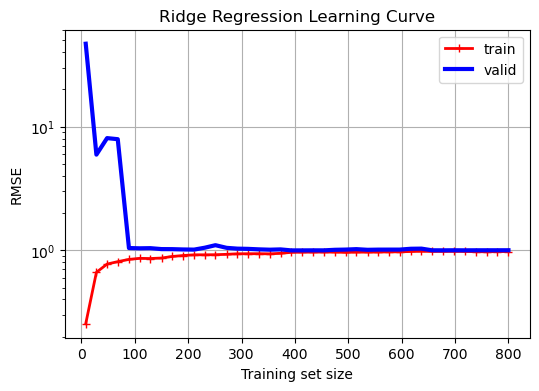

In [5]:
from sklearn.linear_model import Ridge

#Ridge regression
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=0.001, solver="cholesky"), X_poly_scaled, y, 
    train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

#Plot the learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.yscale("log")
plt.grid()
plt.title("Ridge Regression Learning Curve")

plt.show()

**Comment:**
<br>
Based on the above three plots, we see that Linear regression is underfitting, train error is low on the beginning but start to increase, when validation error on the other hand does the opposite.
<br>
Polynomial regression shows signs of overfitting since it has train error equals to 0 and validation error that increases suddenly but then becomes 0 too. This is because the model is too complex due to the high degree of the polynomial.
<br>
Ridge regression perform and generalize well according to the plot.

Apply 10-fold cross-validation for the simple Linear Regression model and calculate the mean RMSE
and its standard deviation.

In [6]:
from sklearn.model_selection import KFold, cross_val_score 

#10-fold cross-validation for Linear Regression
k_folds = KFold(n_splits = 10)
scores = -cross_val_score(LinearRegression(), X_std_scaled, y, cv = k_folds, 
                          scoring='neg_root_mean_squared_error') 

#Calculate mean RMSE and standard deviation
print(f"Cross Validation RMSE: {[np.round(s, 4) for s in scores]}")
print(f"Mean RMSE: {scores.mean():.4f}, with STD: {scores.std():.4f}")

Cross Validation RMSE: [27.5603, 27.2256, 28.2572, 28.2465, 28.8315, 27.2333, 25.6715, 25.0912, 27.3548, 26.9344]
Mean RMSE: 27.2406, with STD: 1.0894


Apply 10-fold cross-validation for the polynomial model without regularization and calculate the mean
RMSE.

In [7]:
#10-fold cross-validation for Polynomial regression
scores2 = -cross_val_score(LinearRegression(), X_poly_scaled, y, cv = k_folds, 
                           scoring='neg_root_mean_squared_error') 

#Calculate mean RMSE and standard deviation
print(f"Cross Validation RMSE: {[np.round(s, 4) for s in scores2]}")
print(f"Mean RMSE: {scores2.mean():.4f}, with STD: {scores2.std():.4f}")

Cross Validation RMSE: [0.9846, 1.073, 0.9781, 1.1786, 1.0198, 6.034, 0.9811, 1.1174, 1.0446, 0.9803]
Mean RMSE: 1.5392, with STD: 1.4996


Apply 10-fold cross-validation for the regularized model and calculate the mean RMSE.

In [8]:
#10-fold cross-validation for Polynomial regression
scores3 = -cross_val_score(Ridge(alpha=0.001, solver="cholesky"), X_poly_scaled,
                           y, cv = k_folds, scoring='neg_root_mean_squared_error') 

#Calculate mean RMSE and standard deviation
print(f"Cross Validation RMSE: {[np.round(s, 4) for s in scores3]}")
print(f"Mean RMSE: {scores3.mean():.4f}, with STD: {scores3.std():.4f}")

Cross Validation RMSE: [0.894, 0.996, 0.9728, 1.0983, 0.9742, 0.9914, 0.938, 1.0824, 1.0561, 0.9362]
Mean RMSE: 0.9939, with STD: 0.0631


**Comment**
<br>
Based on the mean RMSE of each model, Linear regression is the worst among the three, polynomial regression is better, but ridge regression is the best of them since it has the lowest mean RMSE.